# Situación Problema - RNN
## Análisis de imágenes de artículos de vestir con aprendizaje profundo

Ángel Azahel Ramírez Cabello - A01383328

Annette Pamela Ruiz Abreu - A01423595

Franco Mendoza Muraira - A01383399


Tecnológico de Monterrey, Campus Monterrey

TC2035.101 - Diseño de redes neuronales y aprendizaje profundo (Gpo 101)

Dr. Santiago Enrique Conant Pablos

09 de septiembre de 2023


In [67]:
# importa las librerías
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential


In [68]:
# carga el conjunto de datos de dígitos MNIST
data_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = data_mnist.load_data()

In [69]:
# normaliza las intensidades de los pixeles de las imágenes 
x_train, x_test = x_train/255.0, x_test/255.0

In [70]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [71]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Modelo 1

In [6]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [7]:
# define algunos hiper-parámetros
n_epochs=15
n_batch=64
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [8]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [9]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/15


2023-09-09 12:42:43.873028: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


938/938 [==============================] - 26s 27ms/step - loss: 1.0077 - accuracy: 0.6275 - val_loss: 0.7173 - val_accuracy: 0.7410
Epoch 2/15
938/938 [==============================] - 25s 27ms/step - loss: 0.5623 - accuracy: 0.7945 - val_loss: 0.6689 - val_accuracy: 0.7530
Epoch 3/15
938/938 [==============================] - 26s 28ms/step - loss: 0.4653 - accuracy: 0.8299 - val_loss: 0.4852 - val_accuracy: 0.8190
Epoch 4/15
938/938 [==============================] - 25s 26ms/step - loss: 0.4219 - accuracy: 0.8456 - val_loss: 0.5358 - val_accuracy: 0.8001
Epoch 5/15
938/938 [==============================] - 25s 27ms/step - loss: 0.3930 - accuracy: 0.8564 - val_loss: 0.4244 - val_accuracy: 0.8434
Epoch 6/15
938/938 [==============================] - 25s 27ms/step - loss: 0.3725 - accuracy: 0.8637 - val_loss: 0.4080 - val_accuracy: 0.8513
Epoch 7/15
938/938 [==============================] - 27s 29ms/step - loss: 0.3582 - accuracy: 0.8679 - val_loss: 0.3924 - val_accuracy: 0.8581
Epo

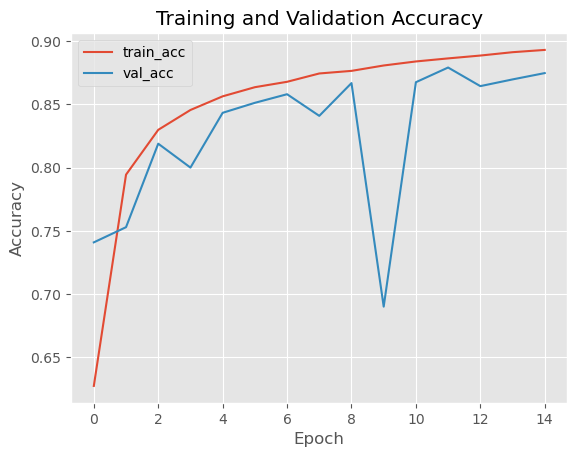

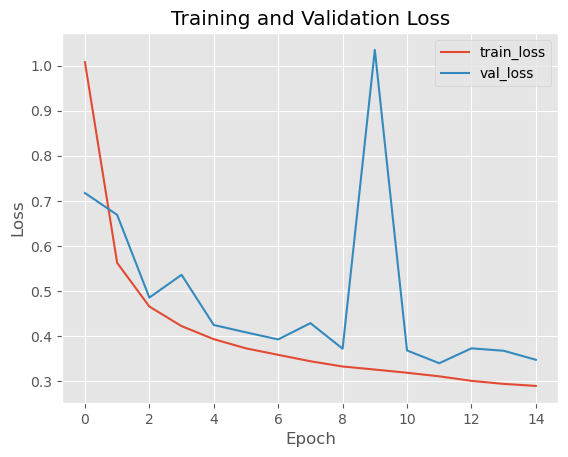

In [10]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [11]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.3472 - accuracy: 0.8748
Precisión en el conjunto de prueba: 0.8748000264167786


## Modelo 2

In [18]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),

   Dropout(0.3),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [19]:
# define algunos hiper-parámetros
n_epochs=25
n_batch=64
learning_rate=0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [20]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [21]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/25
938/938 [==============================] - 26s 28ms/step - loss: 1.9529 - accuracy: 0.3054 - val_loss: 1.3420 - val_accuracy: 0.5389
Epoch 2/25
938/938 [==============================] - 25s 27ms/step - loss: 1.1969 - accuracy: 0.5652 - val_loss: 0.8978 - val_accuracy: 0.6620
Epoch 3/25
938/938 [==============================] - 25s 27ms/step - loss: 0.9432 - accuracy: 0.6601 - val_loss: 0.7588 - val_accuracy: 0.7206
Epoch 4/25
938/938 [==============================] - 24s 26ms/step - loss: 0.8018 - accuracy: 0.7176 - val_loss: 0.9031 - val_accuracy: 0.6387
Epoch 5/25
938/938 [==============================] - 24s 26ms/step - loss: 0.7145 - accuracy: 0.7470 - val_loss: 0.5945 - val_accuracy: 0.7854
Epoch 6/25
938/938 [==============================] - 25s 26ms/step - loss: 0.6586 - accuracy: 0.7684 - val_loss: 0.5814 - val_accuracy: 0.7803
Epoch 7/25
938/938 [==============================] - 25s 27ms/step - loss: 0.6216 - accuracy: 0.7805 - val_loss: 0.5288 - val_accuracy:

In [22]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.4278 - accuracy: 0.8451
Precisión en el conjunto de prueba: 0.8450999855995178


## Modelo 3

In [33]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='tanh', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [34]:
# define algunos hiper-parámetros
n_epochs=25
n_batch=64
learning_rate=0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [35]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [36]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/25
938/938 [==============================] - 25s 26ms/step - loss: 1.1040 - accuracy: 0.6193 - val_loss: 0.7647 - val_accuracy: 0.7211
Epoch 2/25
938/938 [==============================] - 24s 26ms/step - loss: 0.6094 - accuracy: 0.7776 - val_loss: 0.5773 - val_accuracy: 0.7919
Epoch 3/25
938/938 [==============================] - 24s 26ms/step - loss: 0.5332 - accuracy: 0.8095 - val_loss: 0.5334 - val_accuracy: 0.8090
Epoch 4/25
938/938 [==============================] - 24s 26ms/step - loss: 0.4941 - accuracy: 0.8236 - val_loss: 0.7092 - val_accuracy: 0.7510
Epoch 5/25
938/938 [==============================] - 24s 25ms/step - loss: 0.4665 - accuracy: 0.8330 - val_loss: 0.4853 - val_accuracy: 0.8253
Epoch 6/25
938/938 [==============================] - 23s 25ms/step - loss: 0.4454 - accuracy: 0.8408 - val_loss: 0.4663 - val_accuracy: 0.8321
Epoch 7/25
938/938 [==============================] - 24s 26ms/step - loss: 0.4284 - accuracy: 0.8466 - val_loss: 0.4888 - val_accuracy:

In [37]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.3716 - accuracy: 0.8678
Precisión en el conjunto de prueba: 0.8677999973297119


## Modelo 4

In [42]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='tanh', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [43]:
# define algunos hiper-parámetros
n_epochs=30
n_batch=64
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [44]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [45]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/30
938/938 [==============================] - 39s 40ms/step - loss: 0.6893 - accuracy: 0.7426 - val_loss: 0.5745 - val_accuracy: 0.7917
Epoch 2/30
938/938 [==============================] - 34s 36ms/step - loss: 0.4655 - accuracy: 0.8302 - val_loss: 0.5129 - val_accuracy: 0.8103
Epoch 3/30
938/938 [==============================] - 35s 37ms/step - loss: 0.4143 - accuracy: 0.8488 - val_loss: 0.4455 - val_accuracy: 0.8376
Epoch 4/30
938/938 [==============================] - 35s 37ms/step - loss: 0.3859 - accuracy: 0.8561 - val_loss: 0.4585 - val_accuracy: 0.8271
Epoch 5/30
938/938 [==============================] - 35s 37ms/step - loss: 0.3632 - accuracy: 0.8662 - val_loss: 0.4196 - val_accuracy: 0.8482
Epoch 6/30
938/938 [==============================] - 35s 38ms/step - loss: 0.3524 - accuracy: 0.8687 - val_loss: 0.3917 - val_accuracy: 0.8546
Epoch 7/30
938/938 [==============================] - 38s 40ms/step - loss: 0.3334 - accuracy: 0.8750 - val_loss: 0.3798 - val_accuracy:

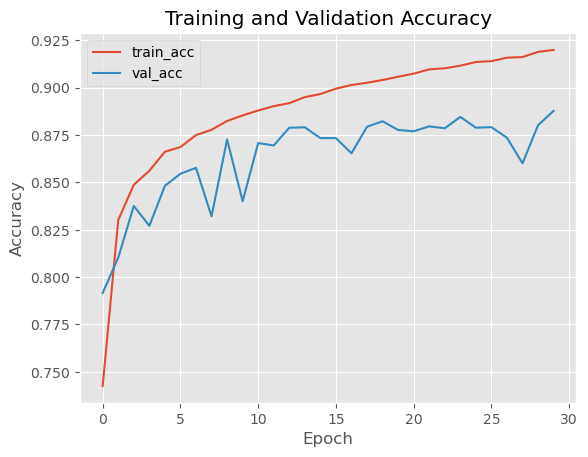

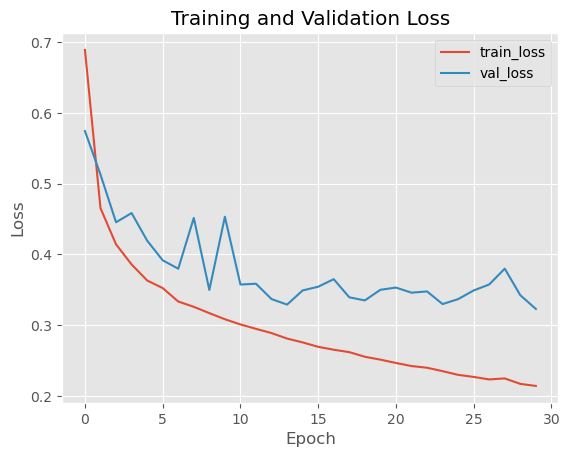

In [46]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [47]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 2s 8ms/step - loss: 0.3230 - accuracy: 0.8878
Precisión en el conjunto de prueba: 0.8877999782562256


## Modelo 5

In [48]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [49]:
# define algunos hiper-parámetros
n_epochs=35
n_batch=65
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [50]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [51]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/35
924/924 [==============================] - 36s 38ms/step - loss: 0.9965 - accuracy: 0.6333 - val_loss: 0.7795 - val_accuracy: 0.7311
Epoch 2/35
924/924 [==============================] - 36s 38ms/step - loss: 0.8788 - accuracy: 0.6891 - val_loss: 1.4071 - val_accuracy: 0.4903
Epoch 3/35
924/924 [==============================] - 36s 39ms/step - loss: 0.6388 - accuracy: 0.7689 - val_loss: 0.5376 - val_accuracy: 0.8005
Epoch 4/35
924/924 [==============================] - 38s 41ms/step - loss: 0.4976 - accuracy: 0.8186 - val_loss: 0.7571 - val_accuracy: 0.6776
Epoch 5/35
924/924 [==============================] - 36s 39ms/step - loss: 0.4455 - accuracy: 0.8374 - val_loss: 0.4429 - val_accuracy: 0.8409
Epoch 6/35
924/924 [==============================] - 39s 42ms/step - loss: 0.4083 - accuracy: 0.8505 - val_loss: 0.8692 - val_accuracy: 0.7440
Epoch 7/35
924/924 [==============================] - 40s 43ms/step - loss: 0.3855 - accuracy: 0.8589 - val_loss: 0.7341 - val_accuracy:

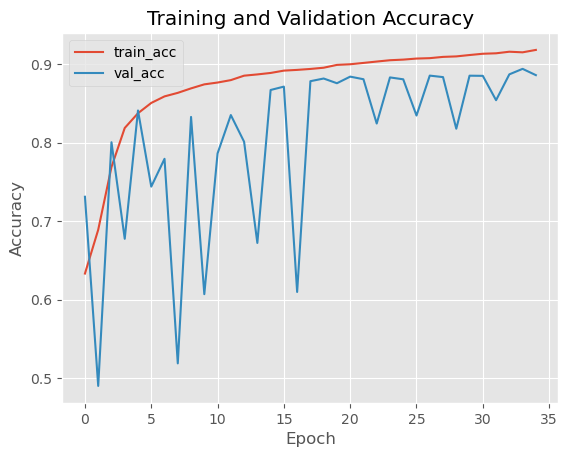

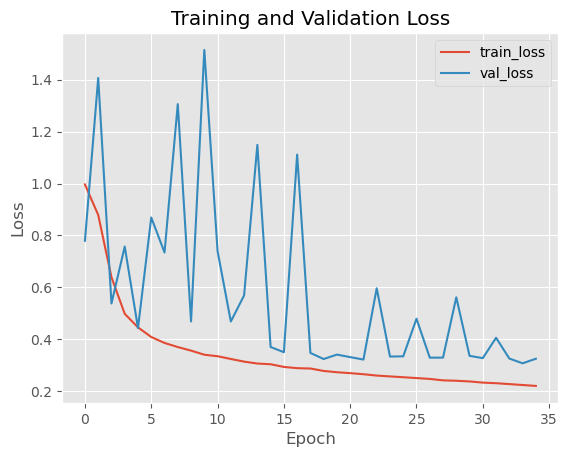

In [52]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [53]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 2s 8ms/step - loss: 0.3245 - accuracy: 0.8859
Precisión en el conjunto de prueba: 0.8859000205993652


## Modelo 6

In [54]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [55]:
# define algunos hiper-parámetros
n_epochs=80
n_batch=64
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [56]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [57]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/80
938/938 [==============================] - 37s 38ms/step - loss: 1.0366 - accuracy: 0.6213 - val_loss: 0.6685 - val_accuracy: 0.7538
Epoch 2/80
938/938 [==============================] - 34s 36ms/step - loss: 0.5467 - accuracy: 0.7996 - val_loss: 0.5501 - val_accuracy: 0.8029
Epoch 3/80
938/938 [==============================] - 34s 36ms/step - loss: 0.4616 - accuracy: 0.8299 - val_loss: 0.5314 - val_accuracy: 0.7970
Epoch 4/80
938/938 [==============================] - 38s 41ms/step - loss: 0.4188 - accuracy: 0.8457 - val_loss: 0.4698 - val_accuracy: 0.8243
Epoch 5/80
938/938 [==============================] - 33s 35ms/step - loss: 0.3910 - accuracy: 0.8563 - val_loss: 0.5506 - val_accuracy: 0.7969
Epoch 6/80
938/938 [==============================] - 34s 36ms/step - loss: 0.3713 - accuracy: 0.8634 - val_loss: 0.4381 - val_accuracy: 0.8379
Epoch 7/80
938/938 [==============================] - 34s 36ms/step - loss: 0.3561 - accuracy: 0.8688 - val_loss: 0.3882 - val_accuracy:

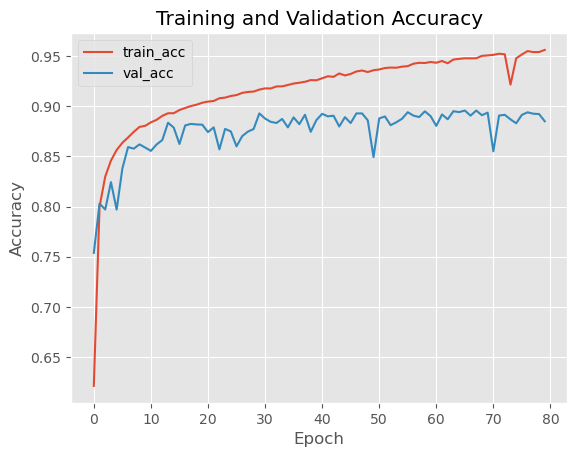

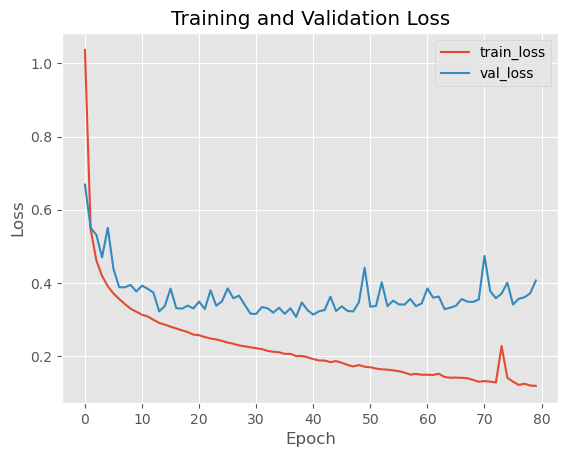

In [58]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [59]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 3s 9ms/step - loss: 0.4066 - accuracy: 0.8849
Precisión en el conjunto de prueba: 0.8848999738693237


In [60]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_24 (SimpleRNN)   (None, 28, 256)           72960     
                                                                 
 simple_rnn_25 (SimpleRNN)   (None, 28, 128)           49280     
                                                                 
 simple_rnn_26 (SimpleRNN)   (None, 64)                12352     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 135,242
Trainable params: 135,242
Non-trainable params: 0
_________________________________________________________________


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Realiza predicciones en el conjunto de prueba
predictions = model.predict(x_test)

# Convierte las etiquetas de un código binario a enteras
y_test = np.argmax(ytest, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Genera el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprime el informe
print(report)




313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.89      0.80      1000
           3       0.89      0.90      0.90      1000
           4       0.81      0.81      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.59      0.66      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



# Modelo 7

In [72]:
# crea el modelo 
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),

   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [73]:
# define algunos hiper-parámetros
n_epochs=35
n_batch=65
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [74]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt,
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [75]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/35
924/924 [==============================] - 46s 49ms/step - loss: 1.0174 - accuracy: 0.6233 - val_loss: 0.7487 - val_accuracy: 0.7094
Epoch 2/35
924/924 [==============================] - 37s 40ms/step - loss: 0.5756 - accuracy: 0.7878 - val_loss: 0.5843 - val_accuracy: 0.7897
Epoch 3/35
924/924 [==============================] - 40s 44ms/step - loss: 0.4739 - accuracy: 0.8273 - val_loss: 1.1707 - val_accuracy: 0.6899
Epoch 4/35
924/924 [==============================] - 63s 69ms/step - loss: 0.4284 - accuracy: 0.8423 - val_loss: 0.5517 - val_accuracy: 0.8098
Epoch 5/35
924/924 [==============================] - 52s 56ms/step - loss: 0.4016 - accuracy: 0.8529 - val_loss: 0.5183 - val_accuracy: 0.8187
Epoch 6/35
924/924 [==============================] - 39s 42ms/step - loss: 0.3780 - accuracy: 0.8595 - val_loss: 0.4572 - val_accuracy: 0.8306
Epoch 7/35
924/924 [==============================] - 39s 43ms/step - loss: 0.3639 - accuracy: 0.8658 - val_loss: 0.4228 - val_accuracy:

In [76]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 2s 8ms/step - loss: 0.3530 - accuracy: 0.8795
Precisión en el conjunto de prueba: 0.8794999718666077


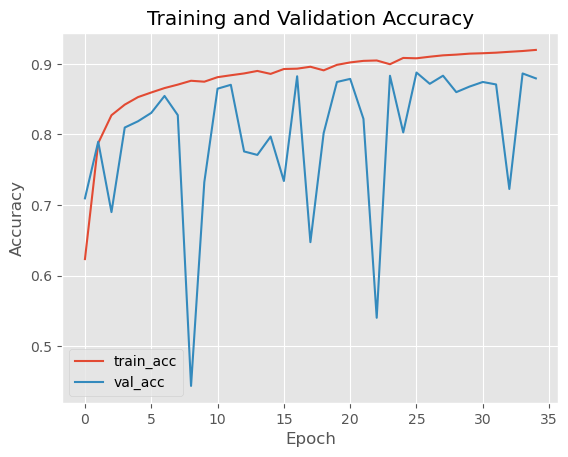

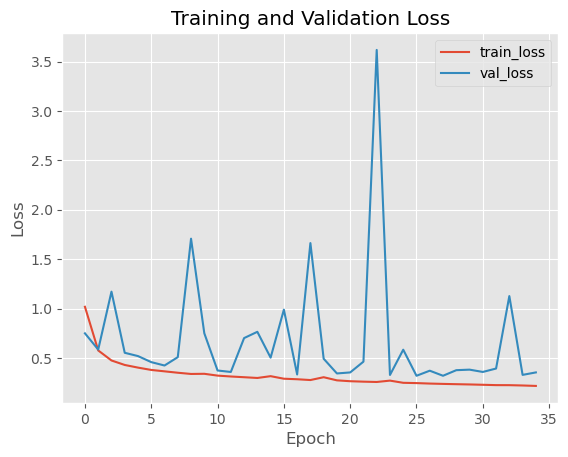

In [77]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Realiza predicciones en el conjunto de prueba
predictions = model.predict(x_test)

# Convierte las etiquetas de un código binario a enteras
y_test = np.argmax(ytest, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Genera el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprime el informe
print(report)




313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.92      0.84      0.88      1000
           4       0.77      0.85      0.81      1000
           5       0.97      0.98      0.98      1000
           6       0.68      0.66      0.67      1000
           7       0.97      0.92      0.95      1000
           8       0.94      0.99      0.96      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

